In [ ]:
import pandas as pd
import numpy as np
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import xgboost as xgb
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.metrics import make_scorer
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier

pf = pd.read_csv("/content/cirrhosis.csv")

pf.head(5)

,ID,Age,N_Days,Status,Drug,Sex,Ascites,Hepatomegaly,Spiders,Edema,...,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Stage3
0,1,21464,400,D,D-penicillamine,F,Y,Y,Y,Y,...,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4,0
1,2,20617,4500,C,D-penicillamine,F,N,Y,Y,N,...,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3,1
2,3,25594,1012,D,D-penicillamine,M,N,N,N,S,...,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4,0
3,4,19994,1925,D,D-penicillamine,F,N,Y,Y,S,...,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4,0
4,5,13918,1504,CL,Placebo,F,N,Y,Y,N,...,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3,1


In [ ]:
pf.describe()

,ID,Age,N_Days,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage3
count,418.000000,418.000000,418.000000,418.000000,284.000000,418.000000,310.000000,312.000000,312.000000,282.000000,407.000000,418.000000,418.000000
mean,209.500000,18533.351675,1917.782297,3.220813,369.510563,3.497440,97.648387,1982.655769,122.556346,124.702128,257.024570,10.692344,0.373206
std,120.810458,3815.845055,1104.672992,4.407506,231.944545,0.424972,85.613920,2140.388824,56.699525,65.148639,98.325585,1.172052,0.484236
min,1.000000,9598.000000,41.000000,0.300000,120.000000,1.960000,4.000000,289.000000,26.350000,33.000000,62.000000,1.000000,0.000000
25%,105.250000,15644.500000,1092.750000,0.800000,249.500000,3.242500,41.250000,871.500000,80.600000,84.250000,188.500000,10.000000,0.000000
50%,209.500000,18628.000000,1730.000000,1.400000,309.500000,3.530000,73.000000,1259.000000,114.700000,108.000000,251.000000,10.600000,0.000000
75%,313.750000,21272.500000,2613.500000,3.400000,400.000000,3.770000,123.000000,1980.000000,151.900000,151.000000,318.000000,11.100000,1.000000
max,418.000000,28650.000000,4795.000000,28.000000,1775.000000,4.640000,588.000000,13862.400000,457.250000,598.000000,721.000000,18.000000,1.000000


In [ ]:
pf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             418 non-null    int64  
 1   Age            418 non-null    int64  
 2   N_Days         418 non-null    int64  
 3   Status         418 non-null    object 
 4   Drug           312 non-null    object 
 5   Sex            418 non-null    object 
 6   Ascites        312 non-null    object 
 7   Hepatomegaly   312 non-null    object 
 8   Spiders        312 non-null    object 
 9   Edema          418 non-null    object 
 10  Bilirubin      418 non-null    float64
 11  Cholesterol    284 non-null    float64
 12  Albumin        418 non-null    float64
 13  Copper         310 non-null    float64
 14  Alk_Phos       312 non-null    float64
 15  SGOT           312 non-null    float64
 16  Tryglicerides  282 non-null    float64
 17  Platelets      407 non-null    float64
 18  Prothrombi

In [ ]:
pf.isna().sum()

ID                 0
Age                0
N_Days             0
Status             0
Drug             106
Sex                0
Ascites          106
Hepatomegaly     106
Spiders          106
Edema              0
Bilirubin          0
Cholesterol      134
Albumin            0
Copper           108
Alk_Phos         106
SGOT             106
Tryglicerides    136
Platelets         11
Prothrombin        0
Stage              6
Stage3             0
dtype: int64

In [ ]:
#filling the null values with the median
pf = pf.fillna(pf.median(numeric_only=True))
pf.isna().sum()

ID                 0
Age                0
N_Days             0
Status             0
Drug             106
Sex                0
Ascites          106
Hepatomegaly     106
Spiders          106
Edema              0
Bilirubin          0
Cholesterol        0
Albumin            0
Copper             0
Alk_Phos           0
SGOT               0
Tryglicerides      0
Platelets          0
Prothrombin        0
Stage              6
Stage3             0
dtype: int64

In [ ]:
categorical_columns = ['Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema']

pf.dropna(subset=categorical_columns, inplace=True)

pf.isna().sum().astype(int)

ID               0
Age              0
N_Days           0
Status           0
Drug             0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Edema            0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
Stage3           0
dtype: int64

LOGISTIC REGRESSION FROM SCRATCH

In [ ]:

X =pf[['Age','N_Days', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT',  'Tryglicerides', 'Platelets',  'Prothrombin' ]].astype(int)
y =pf['Stage3 ']
X.head(5)

,Age,N_Days,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin
0,21464,400,14,261,2,156,1718,137,172,190,12
1,20617,4500,1,302,4,54,7394,113,88,221,10
2,25594,1012,1,176,3,210,516,96,55,151,12
3,19994,1925,1,244,2,64,6121,60,92,183,10
4,13918,1504,3,279,3,143,671,113,72,136,10


In [ ]:
test_size = 0.3
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

X_train.shape

(218, 11)

In [ ]:
class LogisticRegression:
    def __init__(self, learning_rate=0.01, num_iterations=1000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.theta = None

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        m, n = X.shape
        self.theta = np.zeros((n, 1))  # Initialize theta as a column vector

        for _ in range(self.num_iterations):
            z = np.dot(X, self.theta)
            h = self.sigmoid(z)
            gradient = np.dot(X.T, (h - y)) / m
            self.theta -= self.learning_rate * gradient  # Update theta using gradient descent

    def predict(self, X, threshold=0.5):
        if self.theta is None:
            raise ValueError("Model not trained yet. Fit the model first.")

        z = np.dot(X, self.theta)
        predictions = self.sigmoid(z)
        return (predictions >= threshold).astype(int)

# Assuming 'Stage3' is the target variable
X = pf.drop(columns=['ID', 'Stage3 '])  # Features (excluding ID and Stage columns)
y = pf['Stage3 ']  # Remove the extra space

# Add a column of 1s for the intercept term
X['intercept'] = 1

# Split the data into training and testing sets (you can use train_test_split from sklearn.model_selection)
# Assuming X_train, X_test, y_train, y_test are your training and testing sets

# Initialize and train the logistic regression model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Make predictions on the test set
predictions = log_reg.predict(X_test)

# Calculate accuracy (you can use metrics like accuracy_score from sklearn.metrics)
accuracy = np.mean(predictions == y_test)

# Print accuracy
print("Accuracy:", accuracy)


ValueError: Data must be 1-dimensional, got ndarray of shape (218, 218) instead

DECISION TREE

In [11]:

X =pf[['Age','N_Days','Ascites', 'Hepatomegaly','Spiders', 'Edema', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT',  'Tryglicerides', 'Platelets',  'Prothrombin' ]]
y =pf['Stage3 ']
X.head(5)

,Age,N_Days,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin
0,21464,400,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2
1,20617,4500,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6
2,25594,1012,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0
3,19994,1925,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3
4,13918,1504,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9


In [12]:
X = pd.get_dummies(X)

X.head(5)

,Age,N_Days,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Ascites_N,Ascites_Y,Hepatomegaly_N,Hepatomegaly_Y,Spiders_N,Spiders_Y,Edema_N,Edema_S,Edema_Y
0,21464,400,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,False,True,False,True,False,True,False,False,True
1,20617,4500,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,True,False,False,True,False,True,True,False,False
2,25594,1012,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,True,False,True,False,True,False,False,True,False
3,19994,1925,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,True,False,False,True,False,True,False,True,False
4,13918,1504,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,True,False,False,True,False,True,True,False,False


In [13]:
sum(y)/len(y)*100

38.782051282051285

In [14]:
dtree = tree.DecisionTreeClassifier()
dtree.fit(X, y)
print("Accuracy on training set: {:.3f}".format(dtree.score(X, y)))

Accuracy on training set: 1.000


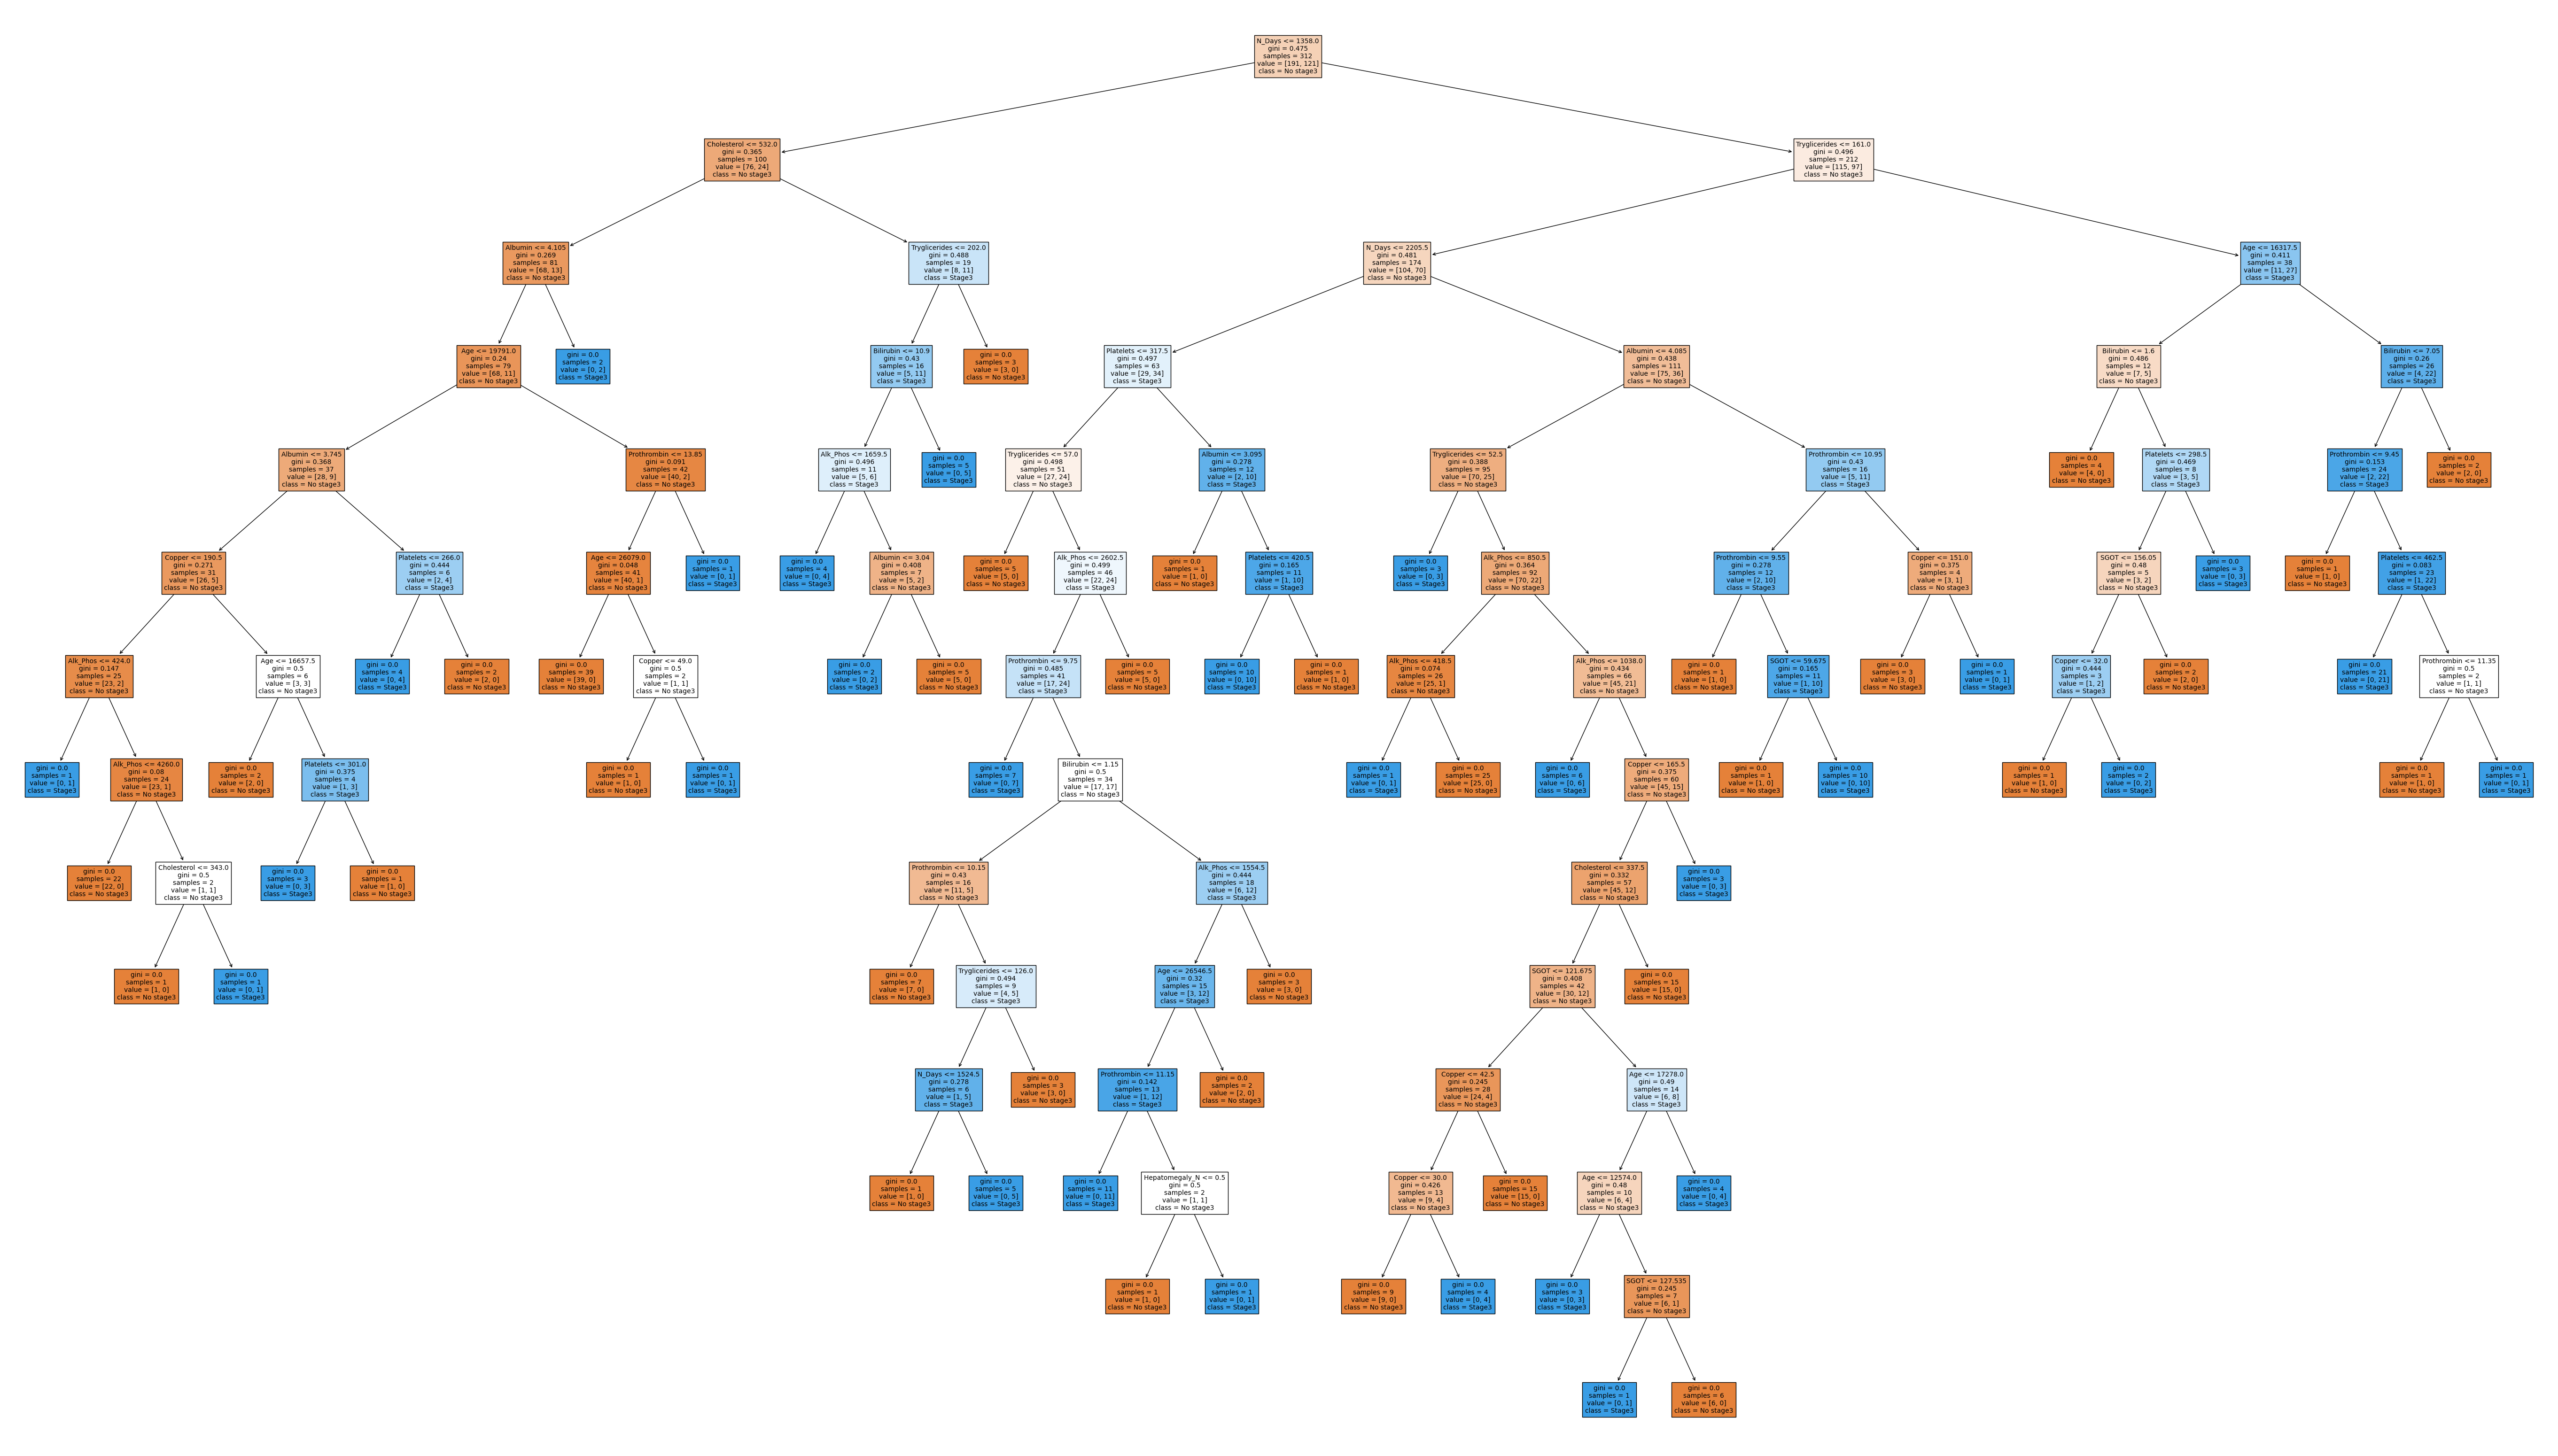

In [15]:
plt.figure(figsize=(70,40))  # set plot size (denoted in inches)
tree.plot_tree(dtree,
               class_names=["No stage3", "Stage3"],
               feature_names=list(X.columns), # label features with the column names from X
               filled=True, # color nodes to indicate majority class
               fontsize=10)
plt.savefig('big_tree.png', bbox_inches='tight') # save plot as png file

LOGISTIC REGRESSION

In [16]:
test_size = 0.3
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

X_train.shape

(218, 20)

In [17]:
# Assuming 'Stage3' is the target variable
X = pf.drop(columns=['ID', 'Stage3 '])  # Features (excluding ID and Stage columns)
y = pf['Stage3 ']  # Target variable (Stage)

# Convert categorical variables to dummy/indicator variables
X = pd.get_dummies(X, columns=['Status', 'Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the logistic regression model
model = LogisticRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
target_names = ['Stage3 ']
print(classification_report(y_test, y_pred, target_names=target_names))


TypeError: can't multiply sequence by non-int of type 'float'

K NEAREST NEIGHBORS

In [18]:
test_size = 0.3
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

X_train.shape

(218, 28)

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

# Assuming 'Stage3' is the target variable
X = pf.drop(columns=['ID', 'Stage3 '])  # Features (excluding ID and Stage columns)
y = pf['Stage3 ']  # Target variable (Stage)

# Convert categorical variables to dummy/indicator variables
X = pd.get_dummies(X, columns=['Status', 'Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the kNN model (you can adjust the value of k)
k = 3
model = KNeighborsClassifier(n_neighbors=k)

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
#target_names = ['Stage3 ']
#report = classification_report(y_test, y_pred, target_names=target_names)

# Print classification report
#print(report)

# Calculate helper metrics
accuracy = model.score(X_test, y_test)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print helper metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Accuracy: 0.5873015873015873
Precision: 0.4375
Recall: 0.2916666666666667
F1 Score: 0.35000000000000003


Desicion tree

In [20]:
tree_reg = DecisionTreeRegressor()
tree_reg.fit(X_train , y_train)
tree_reg_y_pred = tree_reg.predict(X_test)

In [21]:
print("Score on training set: {:.3f}".format(tree_reg.score(X_train, y_train)))
print("Score on test set: {:.3f}".format(tree_reg.score(X_test, y_test)))

Score on training set: 1.000
Score on test set: 0.865


In [22]:
def get_metrics(y_true, y_pred):
    r2 = r2_score(y_true, y_pred)
    # MAE: the average of the absolute differences between the actual values and the predicted values
    mae = mean_absolute_error(y_true, y_pred)

    # MSE: the average of the squared differences between the actual values and the predicted values
    mse = mean_squared_error(y_true, y_pred)

    # RMSE: the square root of MSE
    rmse = mean_squared_error(y_true, y_pred, squared=False)

    # return all three metrics
    return r2, mae, mse, rmse

tree_reg_metrics = get_metrics(y_test, tree_reg_y_pred)
results = pd.DataFrame({
    'Model': ['Decision Tree'],  #model name
    'R2': [tree_reg_metrics[0]], #R2
    'MAE': [tree_reg_metrics[1]], #MAE
    'MSE': [tree_reg_metrics[2]], #MSE
    'RMSE': [tree_reg_metrics[3]] #RMSE
})

results

,Model,R2,MAE,MSE,RMSE
0,Decision Tree,0.865385,0.031746,0.031746,0.178174


In [23]:
# Get feature importances
feature_importances = tree_reg.feature_importances_

# Selecting the top features based on importance
sfm = SelectFromModel(tree_reg, threshold=0.01)
sfm.fit(X_train, y_train)

# Transforming the training and test sets to keep only the selected features
X_train_selected_tree = sfm.transform(X_train)
X_test_selected_tree = sfm.transform(X_test)
X_tree_selected = sfm.transform(X)

# Fitting the DecisionTreeRegressor on the selected features
tree_reg_selected = DecisionTreeRegressor(max_depth=5, min_samples_split=20, random_state=42)
tree_reg_selected.fit(X_train_selected_tree, y_train)

# Making predictions on the test set
tree_reg_selected_y_pred = tree_reg_selected.predict(X_test_selected_tree)

# Displaying the top selected features
selected_features = X_train.columns[sfm.get_support()]

# Printing feature ranking
print("Feature ranking:")
for f in range(X_train_selected_tree.shape[1]):
    print(f"{f + 1}. Feature '{selected_features[f]}': {feature_importances[sfm.get_support()][f]}")

tree_reg_selected_metrics = get_metrics(y_test, tree_reg_selected_y_pred)
results = pd.DataFrame({
    'Model': ['Decision Tree All Features', 'Decision Tree Selected' ],  # Model names
    'R2': [tree_reg_metrics[0], tree_reg_selected_metrics[0] ], # R2 values for each model
    'MAE': [tree_reg_metrics[1], tree_reg_selected_metrics[1] ],  # MAE values for each model
    'MSE': [tree_reg_metrics[2], tree_reg_selected_metrics[2] ], # MSE values for each model
    'RMSE': [tree_reg_metrics[3], tree_reg_selected_metrics[3]] # RMSE values for each model
})

results

Feature ranking:
1. Feature 'Age': 0.014475622044802728
2. Feature 'Cholesterol': 0.01671412029915368
3. Feature 'Stage': 0.9666535361897725


,Model,R2,MAE,MSE,RMSE
0,Decision Tree All Features,0.865385,0.031746,0.031746,0.178174
1,Decision Tree Selected,0.928486,0.019841,0.016865,0.129866


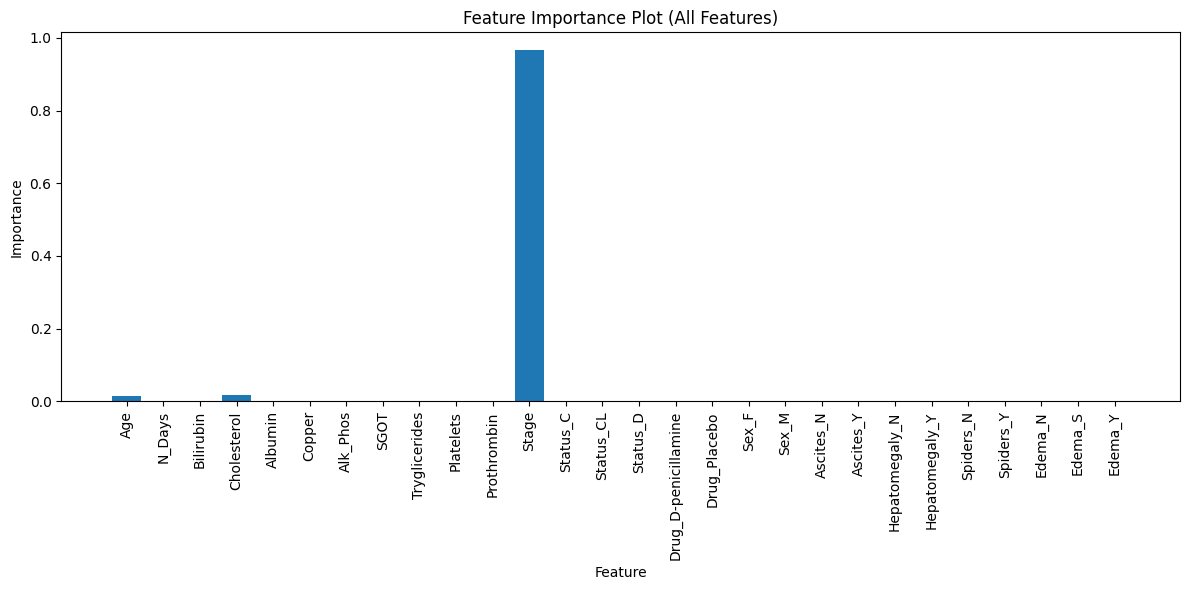

In [24]:
plt.figure(figsize=(12, 6))
plt.bar(range(len(feature_importances)), feature_importances, align="center")
plt.xticks(range(len(feature_importances)), X_train.columns, rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Feature Importance Plot (All Features)")
plt.tight_layout()
plt.show()

Random forest

In [25]:
forest_reg = RandomForestRegressor()
forest_reg.fit(X_train, y_train)
forest_reg_y_pred = forest_reg.predict(X_test)

print("Score on training set: {:.3f}".format(forest_reg.score(X_train, y_train)))
print("Score on test set: {:.3f}".format(forest_reg.score(X_test, y_test)))

Score on training set: 0.990
Score on test set: 0.910


In [26]:
def get_metrics(y_true, y_pred):
    r2 = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = mean_squared_error(y_true, y_pred, squared=False)
    return r2, mae, mse, rmse

# Calculate metrics for Random Forest
forest_reg_metrics = get_metrics(y_test, forest_reg_y_pred)

# Create a DataFrame to display results
results = pd.DataFrame({
    'Model': ['Random Forest'], #model name
    'R2': [forest_reg_metrics[0]],# R2 values for the model
    'MAE': [forest_reg_metrics[1]],# MAE values for each model
    'MSE': [forest_reg_metrics[2]],# MSE values for each model
    'RMSE': [forest_reg_metrics[3]] # RMSE values for each model
})

results


,Model,R2,MAE,MSE,RMSE
0,Random Forest,0.909828,0.034127,0.021265,0.145826
